In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Categorical variables

Categorical Variable: Survived | Sex | Pclass | Embarked | Cabin | Name | Ticket | SibSp | Parch

In [7]:
#hagamos una funcion que crea un barplot para variables categoricas.
def bar_plot(variable):
    var = train[variable]
    # counting the number of categorical variables (value or sample)
    VarValue = var.value_counts()

    plt.figure(figsize = (9,3))
    plt.bar(VarValue.index, VarValue)
    plt.xticks(VarValue.index,VarValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print('{}: \n {}'.format(variable,VarValue))

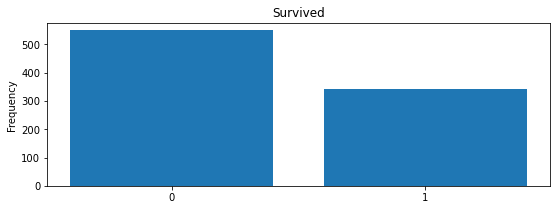

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


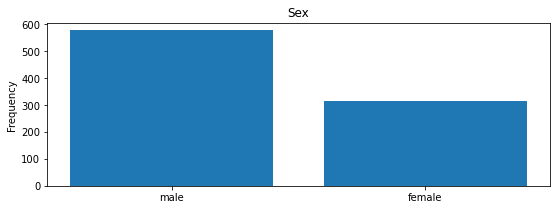

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


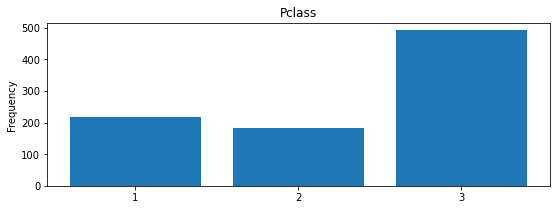

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


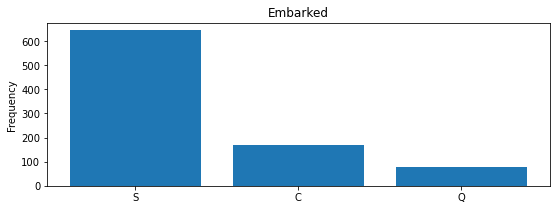

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


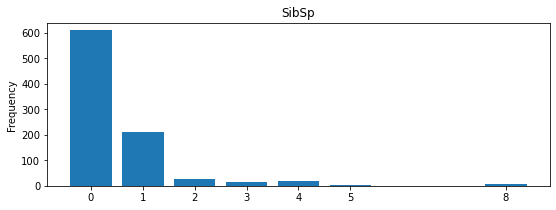

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


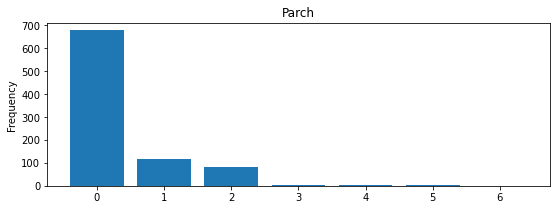

Parch: 
 0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category1 = ['Survived','Sex','Pclass','Embarked','SibSp','Parch']
for c in category1:
    bar_plot(c)

Numerical Variables

In [9]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train[variable],bins = 80)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('{} distribution with hist'.format(variable))
    plt.show()


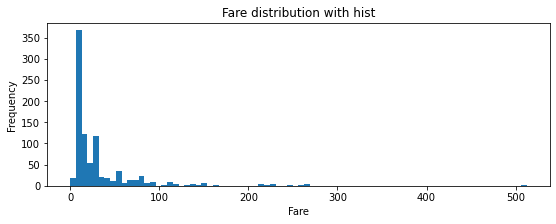

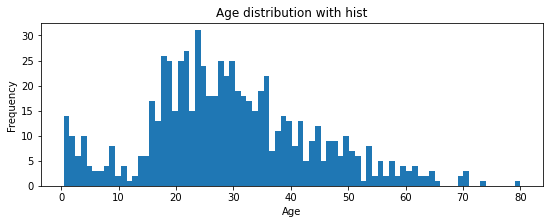

In [10]:
numericVar = ['Fare','Age']
for i in numericVar:
    plot_hist(i)

Analisis de datos (Correlacion)

In [11]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


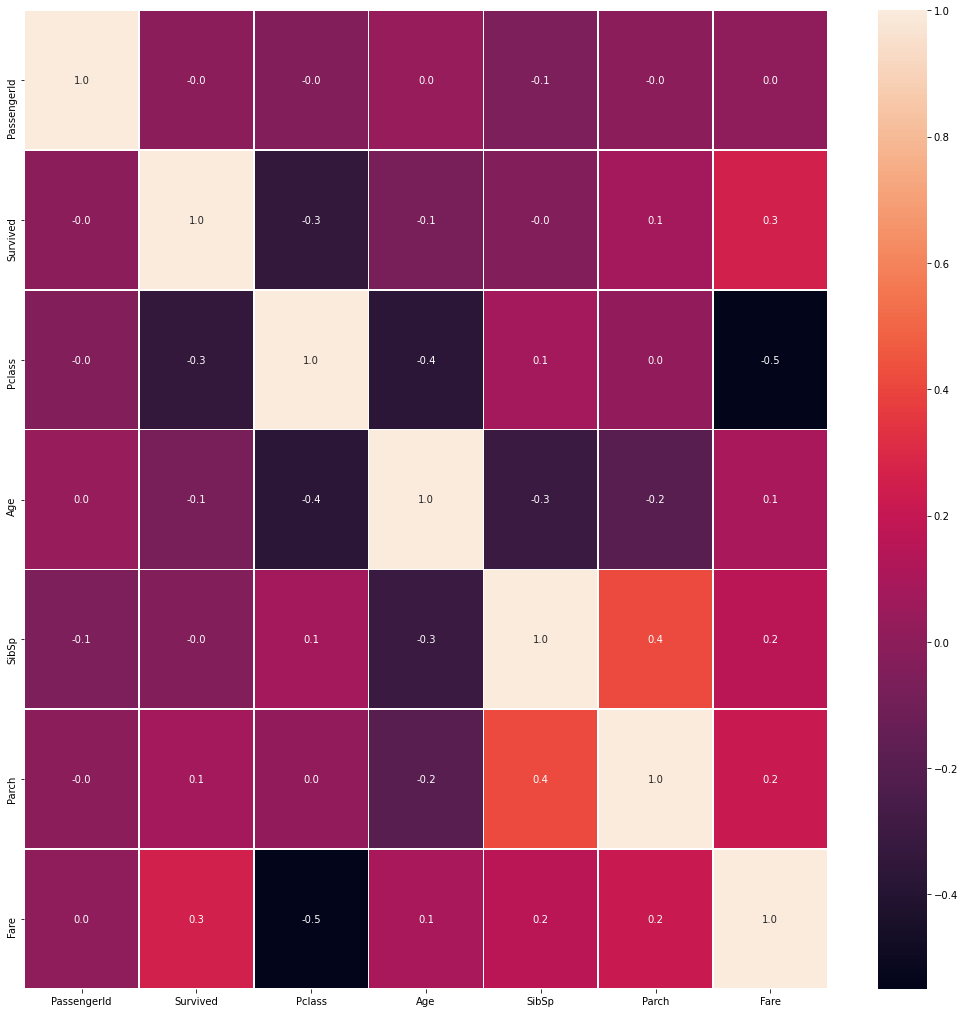

In [12]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(train.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [13]:
train[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train[['Sex','Pclass','Survived']].groupby(['Pclass','Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


In [16]:
train[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train[['Parch','Survived']].groupby(['Parch'],as_index = False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [18]:
train[["SibSp", "Sex","Survived"]].groupby(["SibSp", "Sex"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Sex,Survived
0,0,female,0.787356
4,2,female,0.769231
2,1,female,0.754717
6,3,female,0.363636
8,4,female,0.333333
3,1,male,0.310680
5,2,male,0.200000
1,0,male,0.168203
9,4,male,0.083333
7,3,male,0.000000


In [23]:
#LO PONGO POR SI ACASO PARA EL FUTURO. DETECTAR OUTLIERS
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        
        # 1st quartile:
        
        Q1 = np.percentile(df[c],25)
        
        # 3rd quartile:
        
        Q3 = np.percentile(df[c],75)
        
        # IQR:
        
        IQR = Q3 - Q1
        
        # Outlier step:
        
        outlier_step = IQR * 1.5       
        # detect outlier and their indices:
        
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        
        # store indices:
        
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [26]:
train.loc[detect_outliers(train,["Age", "SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [28]:
# dropping outliers

train = train.drop(detect_outliers(train,["Age", "SibSp","Parch","Fare"]), axis = 0).reset_index(drop=True)

In [29]:
concat_df = pd.concat([train,test], axis = 0).reset_index(drop = True)
len(concat_df)
concat_df.shape

(1299, 12)

In [30]:
concat_df.columns[concat_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [31]:
concat_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [22]:
concat_df[concat_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:title={'center':'Fare'}, xlabel='Embarked'>

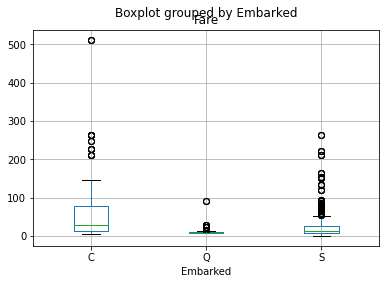

In [37]:
concat_df.boxplot(column="Fare",by = "Embarked")

In [38]:
concat_df["Embarked"] = concat_df["Embarked"].fillna("C")

In [39]:
concat_df[concat_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [40]:
concat_df["Fare"] = concat_df["Fare"].fillna(np.mean(concat_df[concat_df["Pclass"] == 3]["Fare"]))

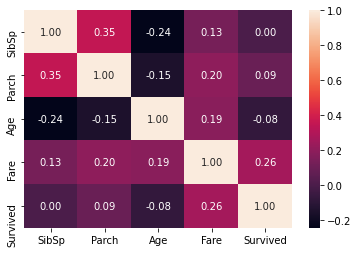

In [41]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(concat_df[list1].corr(), annot=True, fmt = ".2f")
plt.show()

La mayor correlacion se encuentra entre Parch <-> Sibsp y Fare <-> Survived

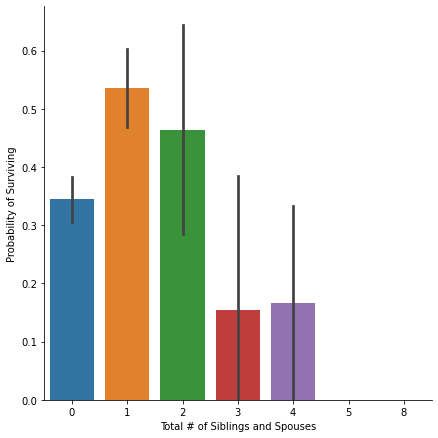

In [43]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = concat_df, kind = "bar", size = 6)
g.set_ylabels("Probability of Surviving")
g.set_xlabels("Total # of Siblings and Spouses")
plt.show()

Mientras más siblings o spouse, menos probabilidad de sobrevivir

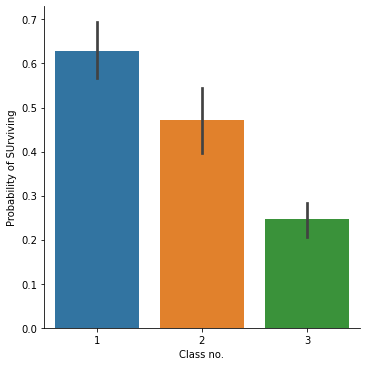

In [44]:
g = sns.factorplot(x="Pclass", y ="Survived", data = concat_df, kind = "bar", size = 5)
g.set_ylabels("Probability of SUrviving")
g.set_xlabels("Class no.")

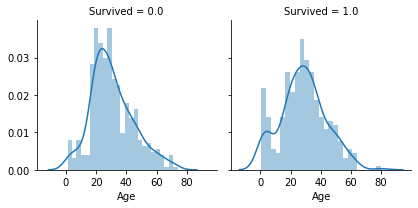

In [45]:
g = sns.FacetGrid(concat_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

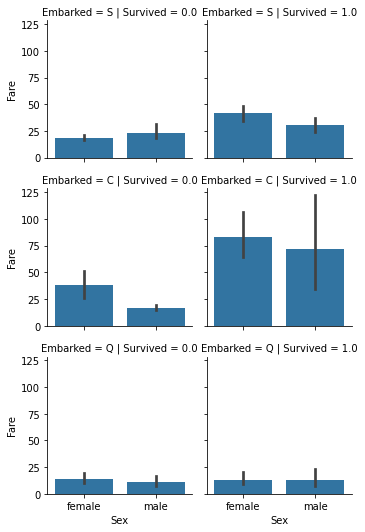

In [46]:
g = sns.FacetGrid(concat_df, row = "Embarked", col = "Survived", size = 2.5)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

Vamos a llenar los missing values en la columna de 'Age'

In [49]:
concat_df[concat_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


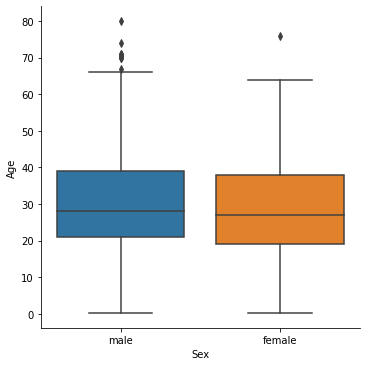

In [50]:
sns.factorplot(x = "Sex", y = "Age", data = concat_df, kind = "box")

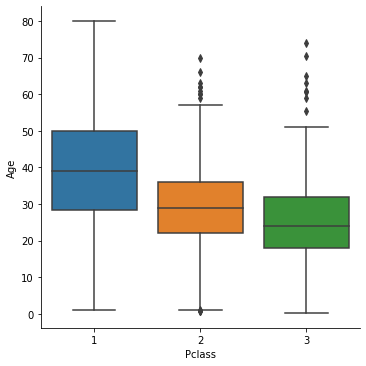

In [52]:
sns.factorplot(x = "Pclass", y = "Age", data = concat_df, kind = "box")

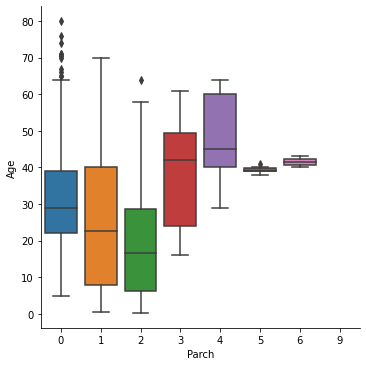

In [53]:
sns.factorplot(x = "Parch", y = "Age", data = concat_df, kind = "box")

In [55]:
concat_df["Sex"] = [1 if i == "male" else 0 for i in concat_df["Sex"]]

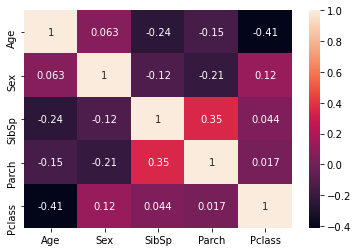

In [56]:
sns.heatmap(concat_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot = True)
plt.show()

In [57]:
index_nan_age = list(concat_df["Age"][concat_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = concat_df["Age"][((concat_df["SibSp"] == concat_df.iloc[i]["SibSp"]) &(concat_df["Parch"] == concat_df.iloc[i]["Parch"])& (concat_df["Pclass"] == concat_df.iloc[i]["Pclass"]))].median()
    age_med = concat_df["Age"].median()
    if not np.isnan(age_pred):
        concat_df["Age"].iloc[i] = age_pred
    else:
        concat_df["Age"].iloc[i] = age_med